# Works through (copypastes) two example notebooks in pyspeckit documentation. First is using functions built into pyspeckit to automatically fit lines. Below that is a guide to fitting lines manually.

In [21]:
import pyspeckit
import matplotlib.pylab as plt
import numpy as np
import astropy.io.fits as fits

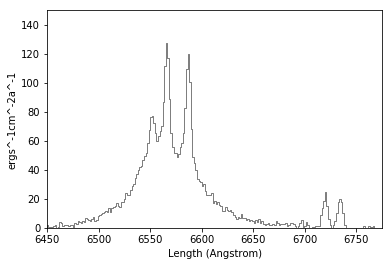

In [22]:
spec = pyspeckit.Spectrum('./py_files/sample_sdss.txt', errorcol=2)
spec.plotter(xmin = 6450, xmax = 6775, ymin = 0, ymax = 150)

In [23]:
# DAMN look at that emission spectrum!

In [24]:
# this one uses a fitting process that involves initial guesses in which z-0

NIIa = 6549.86
NIIb = 6585.27
Halpha = 6564.614
SIIa = 6718.29
SIIb = 6732.68 # units are of course angstrom

In [25]:
# so it looks like whatever fitting function we're about to call is expecting arguments in the form:
# guesses = [amplitude, center, width]. I'm not sure what "tied" is though. Maybe it's providing parameter info?
# also not positive why Halpha is here twice... they aren't filter bands are they?

guesses = [50, NIIa, 5, 100, Halpha, 5, 50, Halpha, 50, 50, NIIb, 5, 20, SIIa,
           5, 20, SIIb, 5]
tied = ['', '', 'p[17]', '', '', 'p[17]', '', 'p[4]', '', '3 * p[0]', '',
        'p[17]', '', '', 'p[17]', '', '', '']

In [26]:
# line fitting happens with this function

spec.specfit(guesses = guesses, tied = tied, annotate = False)

In [27]:
# need to feed speckit some info about the galaxy if you want it to be able to properly analyze the line fits

spec.measure(z = 0.05, fluxnorm = 1e-17) # Parameters should be pretty obvious, fluxnorm not required if normalization
                                         # factor is already present.   

In [28]:
y = spec.plotter.ymax * 0.85    # Location of annotations in y

for i, line in enumerate(spec.measurements.lines.keys()):

    # If this line is not in our database of lines, don't try to annotate it
    if line not in spec.speclines.optical.lines.keys(): continue

    x = spec.measurements.lines[line]['modelpars'][1]   # Location of the emission line
    # Draw dashed line to mark its position
    spec.plotter.axis.plot([x]*2, [spec.plotter.ymin, spec.plotter.ymax],
                           ls='--', color='k')
    # Label it
    spec.plotter.axis.annotate(spec.speclines.optical.lines[line][-1], (x, y),
                               rotation = 90, ha = 'right', va = 'center')
    # Make some nice axis labels
spec.plotter.axis.set_xlabel(r'Wavelength $(\AA)$')
spec.plotter.axis.set_ylabel(r'Flux $(10^{-17} \mathrm{erg/s/cm^2/\AA})$')
spec.plotter.refresh()

# Print out spectral line information
print("Line   Flux (erg/s/cm^2)     Amplitude (erg/s/cm^2)"
      "    FWHM (Angstrom)   Luminosity (erg/s)")
for line in spec.measurements.lines.keys():
    print(line, spec.measurements.lines[line]['flux'],
          spec.measurements.lines[line]['amp'],
          spec.measurements.lines[line]['fwhm'],
          spec.measurements.lines[line]['lum'])

Line   Flux (erg/s/cm^2)     Amplitude (erg/s/cm^2)    FWHM (Angstrom)   Luminosity (erg/s)
NIIa 1.5928079810767e-15 2.485595321693565e-16 6.020059589644886 9.383077603431559e+39
H_3-2 4.56987115346435e-15 7.131336918663009e-16 6.020059589644886 2.6920668517528277e+40
H_3-2_1 4.439595067847635e-14 5.420641198399654e-16 76.94147161591337 2.6153224710280008e+41
NIIb 4.778423943230101e-15 7.456785965080696e-16 6.020059589644886 2.8149232810294687e+40
SIIa 1.4196357429185938e-15 2.2153580362663356e-16 6.020059589644886 8.362936714698031e+39
SIIb 1.3266718029542009e-15 2.070286730115862e-16 6.020059589644886 7.815295144986027e+39


In [29]:
spec.specfit.plot_fit()


Legend.draggable() is drepecated in favor of Legend.set_draggable(). Legend.draggable may be reintroduced as a property in future releases.


In [30]:
spec.specfit.print_fit()

     AMPLITUDE0:       24.856 +/-     0.637563
         SHIFT0:      6551.69 +/-     0.218836
         WIDTH0:      2.55648 +/-            0
     AMPLITUDE1:      71.3134 +/-      2.04776
         SHIFT1:      6565.86 +/-    0.0778487
         WIDTH1:      2.55648 +/-            0
     AMPLITUDE2:      54.2064 +/-     0.665352
         SHIFT2:      6565.86 +/-            0
         WIDTH2:       32.674 +/-      0.28567
     AMPLITUDE3:      74.5679 +/-            0
         SHIFT3:      6586.74 +/-    0.0770116
         WIDTH3:      2.55648 +/-            0
     AMPLITUDE4:      22.1536 +/-      1.05101
         SHIFT4:      6719.62 +/-     0.157829
         WIDTH4:      2.55648 +/-            0
     AMPLITUDE5:      20.7029 +/-      1.04717
         SHIFT5:      6734.14 +/-     0.170072
         WIDTH5:      2.55648 +/-    0.0535433


In [31]:
spec.plotter.figure.show() # kind of seems like it shouldnt be doing this, but whatever; just making a png
                           # works for now

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


In [32]:
spec.plotter.figure.savefig("./py_files/sdss_fit_example.png")

# On to the next:

## Interactive line-fitting: maybe a good option?
In this example the pyspeckit documentation lays out a helpful little 5-step process for (graphically) fitting your own lines interactively.

#### #1. load spectrum

In [33]:
sp = pyspeckit.Spectrum('./py_files/hr2421.fit')

#### #2. plot the line you want to fit

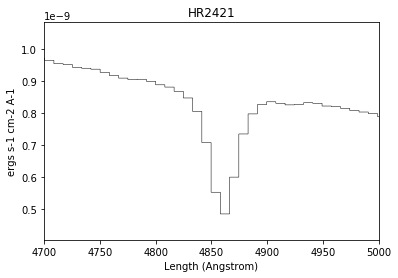

In [34]:
sp.plotter(xmin=4700,xmax=5000)

#### #3. fit continuum

In [35]:
sp.baseline(interactive=True, subtract=False)


(1) Left-click or press 1 (one) at two positions to select or add to the baseline fitting range - it will be
highlighted in green if the selection is successful.
    You can select regions to e/x/clude by pressing 'x' at two positions
(2) Middle or right click or press '2','m', '3', or 'd' to /d/isconnect and perform the fit.
    If you press '2','m', or middle-click, the baseline will be subtracted
    If you press '3','d', or right-click, the baseline will be plotted but not subtracted



Include mask was uniformly True.  
This has the effect of making the 'baseline' command do nothing.
If this was not your intent, try spectrum.baseline(interactive=True,reset_selection=True)


#### #4. ???????

#### #5. profit/fit lines

In [36]:
# oh screw this for now